In [141]:
import numpy as np
import random
from deap import base, creator, tools, algorithms 
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
#algoritmy obsahuje spoustu algoritmu pro pocitani 
#dnes budeme pouzivat jeden algoritmus s 6 parametrami

In [142]:
creator.create("FitnessMax", base.Fitness, weights=(0.5,-0.5,))#Fitness funkce - sada hodnot, kde zkoumame jestli je hodnota platna nebo ne
#dulezitost fitness funkce je pomoci váh -1 1

In [143]:
creator.create("Individual", list, fitness=creator.FitnessMax)
#Jedinec se jmenuje Individual, druhej parametr muze byt cokoliv array, numpy array a pod, u nas to bude seznam
#fitness nam rika, jak budeme merit fitness funkci jmenem fitnessFunkce budeme volat tu funkci fitnes=creator.*

In [144]:
IND_SIZE = 22 # zde si naplnim pocet individualu
toolbox = base.Toolbox()

toolbox.register("attr_float", random.random)#naplni mi toolbox 0 a 1
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_float, n=IND_SIZE)
#toolbox.register("individual", initind, IND_LEN)  # název, funkce, poporade parametry krmici funkci
ind1 = toolbox.individual()

In [145]:
def plotterrain(t):
    fig, ax = plt.subplots()
    x = range(len(t))
    sea = [0.5 for i in range(len(t))]
    ax.fill_between(x, sea, color="turquoise")
    ax.fill_between(x, t, color="sandybrown")
    ax.axis("off")
# plotterrain(ind1)

In [146]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual) 
# init repeat opakuje dle parametru za ni, tedy dela list individii dle zakladni inicializace individia

pop = toolbox.population(n=10)
# print(pop)

## Fitness

The lakes:  54  The nodes:  75


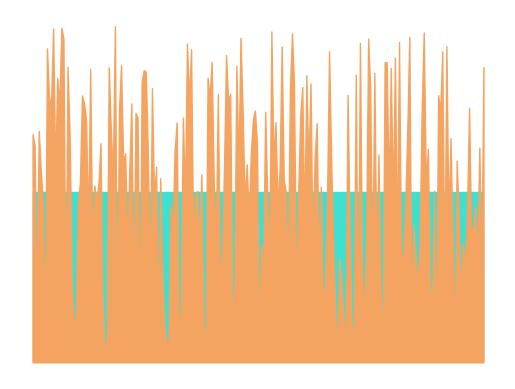

In [147]:
def evaluate(individual):
    
    #Lakes counting
    lake = 0
    waitingForLake = False
    if individual[len(individual)-1] < 0.5 and waitingForLake:
        lake += 1
        waitingForLake = False
    if individual[0] < 0.5:
        lake += 1
        waitingForLake = False
    for i in range(len(individual) - 1):
        if(individual[i] >= 0.5):
            waitingForLake = True
        elif(individual[i] < 0.5 and waitingForLake):
            lake += 1
            waitingForLake = False
    
    #Pocet vrcholu
    nodes = 0
    waitingForTop = False

    if(individual[0] > individual[1]):
        nodes += 1
    if(individual[len(individual)-1] > individual[len(individual)-2]):
        nodes += 1
    for i in range(1,len(individual) -1):
        if(individual[i] > individual[i-1]):
            waitingForTop = True
        if(individual[i] <= individual[i-1] and waitingForTop):
            nodes += 1
            waitingForTop = False
        

    return lake, nodes

plotterrain(ind1)

values = evaluate(ind1)
print("The lakes: ", values[0], " The nodes: ", values[1])

In [148]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual) 
# init repeat opakuje dle parametru za ni, tedy dela list individii dle zakladni inicializace individia


In [149]:
toolbox.register("evaluate", evaluate)

In [150]:
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=1, indpb=0.05)#pravdepodobnost jestli zmutuji jednotlivy bit
toolbox.register("select", tools.selTournament, tournsize=3)

In [151]:
# hlavní parametry vystrčené kvůli experimentování

NGEN = 500            # počet generací
CXPB = 0.7           # pravděpodobnost crossoveru na páru
MUTPB = 0.2         # pravděpodobnost mutace jedince

#finalpop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN)

In [152]:

s = tools.Statistics(key=lambda ind: ind.fitness.values)
s.register("mean", np.mean)
s.register("max", np.max)


hof = tools.HallOfFame(1)  # pamatuje si 1 nejlepšího jedince za historii evoluce (i když zanikne)

pop = toolbox.population(n=10)


finalpop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=s, halloffame=hof)

gen	nevals	mean 	max
0  	10    	64.75	79 
1  	9     	65.3 	79 
2  	7     	65.85	79 
3  	6     	67.9 	81 
4  	5     	69.3 	80 
5  	9     	70.25	80 
6  	10    	70.9 	80 
7  	7     	72.55	80 
8  	5     	72.85	80 
9  	8     	73.2 	80 
10 	9     	73.35	80 
11 	8     	73.45	80 
12 	8     	73   	80 
13 	10    	73.2 	80 
14 	10    	72.7 	80 
15 	8     	73.05	81 
16 	8     	74.2 	81 
17 	9     	74.85	82 
18 	8     	75.2 	81 
19 	6     	75.35	81 
20 	8     	75.4 	82 
21 	10    	74.7 	81 
22 	7     	75.2 	81 
23 	8     	75.2 	82 
24 	7     	75.45	82 
25 	8     	76.1 	83 
26 	7     	76.45	83 
27 	9     	76.95	83 
28 	6     	76.55	83 
29 	7     	77.4 	83 
30 	6     	77.3 	82 
31 	7     	77.5 	82 
32 	7     	78   	83 
33 	4     	78   	82 
34 	7     	78   	84 
35 	10    	77.55	82 
36 	10    	78.1 	84 
37 	8     	78   	85 
38 	8     	78.75	84 
39 	8     	79.55	85 
40 	9     	80.25	85 
41 	6     	80.3 	85 
42 	10    	79.75	84 
43 	8     	79.85	83 
44 	10    	79.05	82 
45 	8     	80   	82 
46 	7     	80

In [153]:
mean, maximum = logbook.select("mean", "max")
#print(hof)

[0, 0.3194625817666268, 0.7329185675443579, 0.47352479225767763, 0.7190791101500739, 0.11738438524732842, 1, 1, 0.22380890439899714, 0.5422473955947392, 0.7576399058596892, 0.28971829058534926, 0.6636302382353576, 0.46989013503288934, 1, 1, 0.26903187354637903, 0, 0.565589227046635, 0, 0.5521002518181504, 0, 0.7958109444656033, 0.31064853770819145, 0.6492125432541728, 0, 0.44094229631081705, 0.7530961026096353, 0.5899458773996323, 0.18284973614142042, 1, 0.49869440476521276, 1, 0.07097990550631395, 0.8036178452151528, 0.15758436738162318, 1, 0.2357765701980451, 0.5156340039427543, 0.286423852880624, 1, 0.17826944000993328, 1, 0, 0.38186923872560674, 1, 0.316087027903861, 0.8072770679873321, 0, 0, 0.9466010983607595, 0.23293089406777356, 1, 0.1736872091575944, 1, 0.3266754118443129, 1, 0, 0.6205841124082949, 0.14475011065382049, 1, 0, 0.7916752991928375, 0, 0.6029983464125195, 0, 0.56557025147422, 0.12787906761967283, 0.7477268651150508, 0.44647781105771356, 1, 0, 1, 0, 0.91947097817431

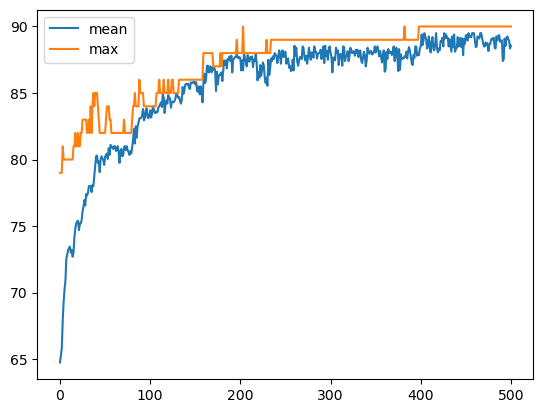

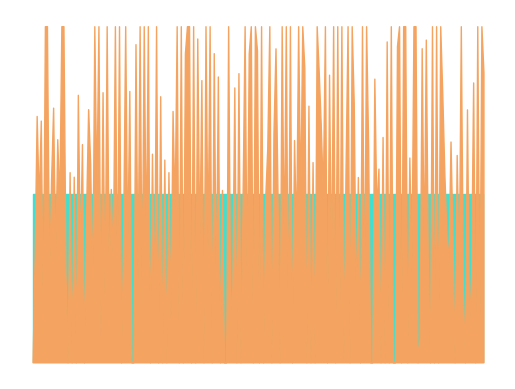

In [154]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(range(NGEN+1), mean, label="mean")     # 0.tá generace zvlášť
ax.plot(range(NGEN+1), maximum, label="max")

ax.legend()

plotterrain(hof[0])
print(hof[0])
print(evaluate(hof[0]))
